### 회귀 - KNN
- KNeighborsRegressor 학습 알고리즘 사용
- 데이터 : student_info.csv
- 목적 : 키에 따른 몸무게를 예측하는 예측기

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt

#### [1] 데이터 준비 및 분석

In [10]:
stdDF = pd.read_csv("student_info.csv", usecols=[1, 2, 3])

In [11]:
stdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     90 non-null     object
 1   weight_kg  90 non-null     int64 
 2   height_cm  90 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


In [12]:
stdDF.head(3)

,gender,weight_kg,height_cm
0,m,98,198
1,m,77,170
2,m,70,170


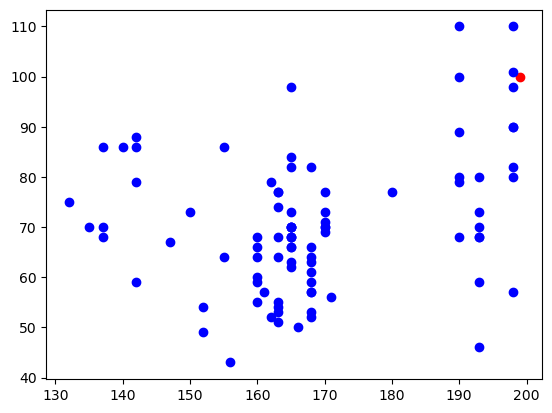

In [76]:
# 데이터와 타겟 선형관계
plt.plot(stdDF.height_cm, stdDF.weight_kg, 'bo')
plt.scatter(199, 100, c = 'red')
plt.show()

In [14]:
# 데이터와 타겟 상관관계
stdDF.corr()

,weight_kg,height_cm
weight_kg,1.000000,0.276307
height_cm,0.276307,1.000000


In [19]:
m_data = stdDF[stdDF.gender == 'm']
m_data.corr()

,weight_kg,height_cm
weight_kg,1.000000,0.116982
height_cm,0.116982,1.000000


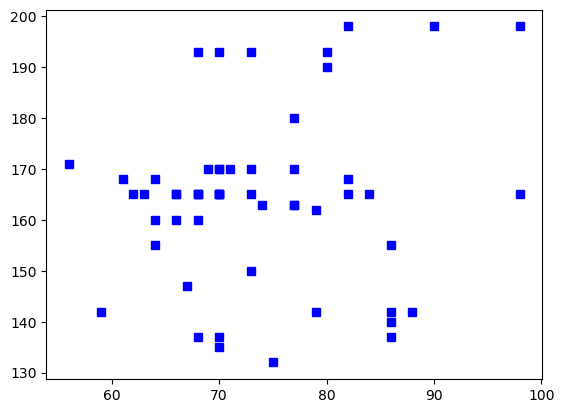

In [26]:
plt.plot(m_data.weight_kg, m_data.height_cm, 'bs')
plt.show()

In [20]:
w_data = stdDF[stdDF.gender == 'f']
w_data.corr()

,weight_kg,height_cm
weight_kg,1.000000,0.684917
height_cm,0.684917,1.000000


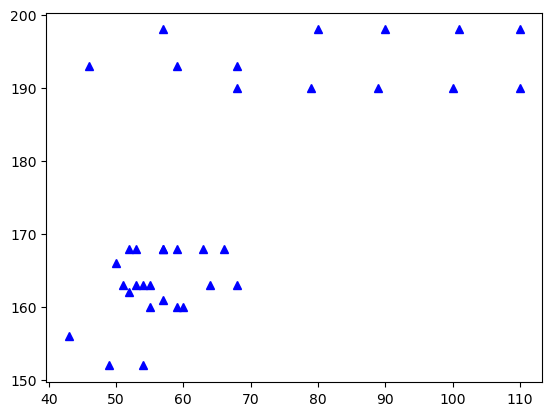

In [25]:
plt.plot(w_data.weight_kg, w_data.height_cm, 'b^')
plt.show()

#### [2] 데이터 전처리

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [56]:
import numpy as np

data = np.array(stdDF.height_cm).reshape(-1, 1)
target = stdDF.weight_kg

In [57]:
st = StandardScaler()
st_data = st.fit_transform(data)

#### [3] 학습용 데이터 준비 => train, test, valid

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=11)

In [53]:
X_train.shape, y_test.shape, type(X_train)

((67, 1), (23,), numpy.ndarray)

#### [4] 학습 모델 객체 생성 및 학습

In [72]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [69]:
for n in range(1, X_train.shape[0]):
    model.n_neighbors = n
    model.fit(X_train, y_train)
    sc = model.score(X_train, y_train)
    print(f"[{n} : score : {round(sc, 1)}]")

[1 : score : 0.1]
[2 : score : 0.2]
[3 : score : 0.3]
[4 : score : 0.4]
[5 : score : 0.4]
[6 : score : 0.4]
[7 : score : 0.3]
[8 : score : 0.3]
[9 : score : 0.3]
[10 : score : 0.3]
[11 : score : 0.3]
[12 : score : 0.3]
[13 : score : 0.2]
[14 : score : 0.2]
[15 : score : 0.2]
[16 : score : 0.2]
[17 : score : 0.2]
[18 : score : 0.2]
[19 : score : 0.2]
[20 : score : 0.2]
[21 : score : 0.2]
[22 : score : 0.1]
[23 : score : 0.1]
[24 : score : 0.1]
[25 : score : 0.1]
[26 : score : 0.1]
[27 : score : 0.1]
[28 : score : 0.1]
[29 : score : 0.1]
[30 : score : 0.1]
[31 : score : 0.1]
[32 : score : 0.1]
[33 : score : 0.1]
[34 : score : 0.1]
[35 : score : 0.1]
[36 : score : 0.1]
[37 : score : 0.1]
[38 : score : 0.1]
[39 : score : 0.1]
[40 : score : 0.1]
[41 : score : 0.1]
[42 : score : 0.1]
[43 : score : 0.1]
[44 : score : 0.1]
[45 : score : 0.1]
[46 : score : 0.1]
[47 : score : 0.1]
[48 : score : 0.1]
[49 : score : 0.1]
[50 : score : 0.1]
[51 : score : 0.0]
[52 : score : 0.0]
[53 : score : 0.0]
[5

#### [5] 예측 및 평가

In [80]:
model.predict([[250.0]])

array([83.4])

In [81]:
# 170을 기준으로 지정한 k개 가까운 값 찾기
print('k = ', model.n_neighbors)
model.kneighbors([[250.0]])[1]

k =  5


array([[32, 64, 39,  4, 23]], dtype=int64)

📌 키에 큰 숫자를 입력을 해도 근방에 있는 k개를 가져오기 때문에 값은 같은 범위에서 추출됨

In [84]:
X =[[0], [1], [2], [3]]
y = [0, 0, 1, 1]

In [85]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]

In [86]:
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=1)

In [88]:
neigh.kneighbors([[1.5]])

(array([[0.5]]), array([[1]], dtype=int64))

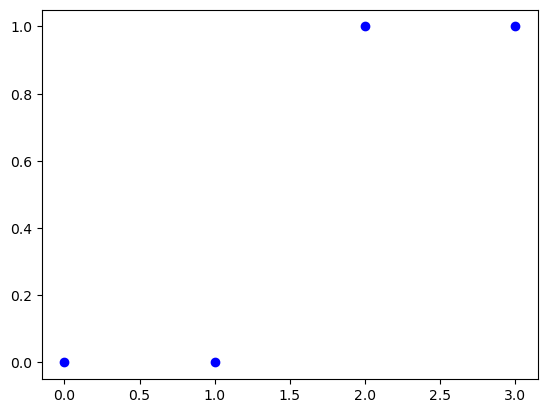

In [90]:
plt.plot(X, y, 'bo')
plt.show()